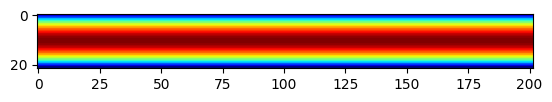

In [ ]:
from numpy import *
import matplotlib.pyplot as plt


maxIter = 2000 # total number of time iteration
Re = 222        #reynolds number
nx, ny = 202, 22  # number of lattice nodes
cs = sqrt(1/3)
tau = float(.988)    #relaxation parameter
nulb = cs**2*(tau-.5) # viscoscity in lattice unites
dpdx = 1e-05
rho0 = 1

fin = zeros((9, nx, ny))

            #0     1       2
v = array([[1,1], [1,0], [1,-1], #3      4      5
                                [0,1], [0,0], [0,-1],  #6      7       8
                                                     [-1,1], [-1,0], [-1,-1]])

t = array([[1/36], [1/9], [1/36],
                                 [1/9], [4/9], [1/9],
                                                     [1/36], [1/9], [1/36]])


### Function Definitions #####################################################

def fluid_solid(nx, ny):
  solid = zeros((nx, ny), dtype=bool)
  solid[:, [-1,0]] = True
  return solid

def macroscopic(fin):
    rho = sum(fin, axis = 0)
    u = zeros((2, nx, ny))
    for i in range(9):
        u[0, :, :] += v[i, 0] * fin[i, :, :]
        u[1, :, :] += v[i, 1] * fin[i, :, :]
    u[0] = (u[0] + 0.5*dpdx)/rho
    u[1] = u[1]/rho
    return rho, u


def equilibrium(rho, u):
    usqr = (3/2) * (u[0]**2 + u[1]**2)
    feq = zeros((9, nx, ny))
    for i in range(9):
        uv = 3* (v[i, 0] * u[0,: ,:] + v[i, 1] * u[1, :, :])
        feq[i, :, :] = rho * t[i] *(1 + uv + 0.5* uv**2 - usqr)
    return feq

def source_term(u):
  source = zeros((9,nx,ny))
  for i in range(9):
    source[i,:,:] = (1-0.5/tau)*t[i]*(3*(v[i, 0]-u[0,:,:]) + 9*(v[i, 0]*u[0,:,:]+v[i, 1]*u[1,:,:])*v[i, 0])*dpdx
  return source
### Setup ##############################################################

solid = fluid_solid(nx, ny)
for i in range(9):
    fin[i,:,:] = t[i]*rho0


### Main Time Loop ###########################################################

for time in range(0, maxIter + 1):
    # Periodic B.C.
    # fin[:,0,:] = fin[:,-2,:]
    # fin[:,-1,:] = fin[:,1,:]
    #compute macroscopic variables, rho and u
    rho, u = macroscopic(fin)
    # compute equibliruim
    feq = equilibrium(rho, u)
    # collision step
    source = source_term(u)
    fout = fin - (fin - feq)/tau + source
    # streaming step
    for i in range(9):
      fin[i, :, :] = roll(roll(fout[i,:,:], v[i,0], axis = 0), v[i, 1], axis = 1)
    # bounce-back , wet-node
    for i in range(9):
      fin[i, solid] = fout[8-i, solid]




    if time == 2000:
        plt.clf()
        imgplot = plt.imshow(sqrt(pow(u[0], 2)+pow(u[1], 2)).transpose() , cmap=cm.jet)
        plt.show()

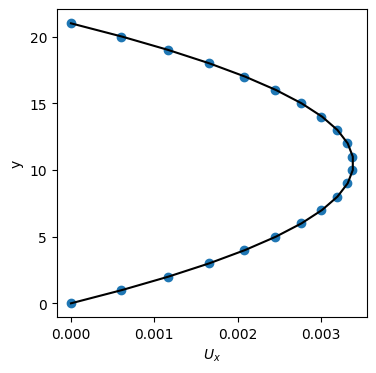

In [ ]:
momentx = u[0,nx-1,0:ny]
height = []
H = ny-1
ux_exact = [0] * (ny)
for j in range(0,ny,1):
    y = j/H
    y2 = y*y
    ux_exact[j]= 0.5*1e-05*H*H*(y-y2)/nulb
    height.append(j)
#verify the model
fig = plt.figure(figsize = (4, 4))
plt.scatter(momentx,height,label='LBM')
plt.plot(ux_exact,height,'k', label='analytical')
plt.ylabel('y')
plt.xlabel(r'$U_x$')
plt.show()